In [37]:
df = pd.read_csv('train.csv')

In [43]:
df_t = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, pd.NA)

In [44]:
df_t.isnull().sum()

Glucose                       4
BloodPressure                30
SkinThickness               195
Insulin                     318
BMI                           7
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [46]:
df_t = df_t.dropna()

In [47]:
df_t

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,103,60,33,192,24.0,0.966,33
3,119,88,41,170,45.3,0.507,26
4,114,66,36,200,38.1,0.289,21
5,78,50,32,88,31.0,0.248,26
6,91,54,25,100,25.2,0.234,23
...,...,...,...,...,...,...,...
636,171,110,24,240,45.4,0.721,54
637,152,90,33,29,26.8,0.731,43
638,139,62,41,480,40.7,0.536,21
643,147,74,25,293,34.9,0.385,30


In [48]:
df_t.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Glucose,1.000000,0.213390,0.214293,0.600479,0.212549,0.140880,0.342942
BloodPressure,0.213390,1.000000,0.249560,0.088505,0.292520,-0.031260,0.301791
SkinThickness,0.214293,0.249560,1.000000,0.200479,0.632375,0.119519,0.182784
Insulin,0.600479,0.088505,0.200479,1.000000,0.258074,0.182614,0.196610
BMI,0.212549,0.292520,0.632375,0.258074,1.000000,0.111317,0.078956
DiabetesPedigreeFunction,0.140880,-0.031260,0.119519,0.182614,0.111317,1.000000,0.103043
Age,0.342942,0.301791,0.182784,0.196610,0.078956,0.103043,1.000000


In [49]:
X = df_t[['BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [51]:
X = df_t.drop('Glucose', axis=1)
X

,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,60,33,192,24.0,0.966,33
3,88,41,170,45.3,0.507,26
4,66,36,200,38.1,0.289,21
5,50,32,88,31.0,0.248,26
6,54,25,100,25.2,0.234,23
...,...,...,...,...,...,...
636,110,24,240,45.4,0.721,54
637,90,33,29,26.8,0.731,43
638,62,41,480,40.7,0.536,21
643,74,25,293,34.9,0.385,30


In [53]:
y = df_t['Glucose']
y

0      103
3      119
4      114
5       78
6       91
      ... 
636    171
637    152
638    139
643    147
650     81
Name: Glucose, Length: 332, dtype: object

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
model = LinearRegression()

In [70]:
model2 = PolynomialFeatures(2)

In [57]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [58]:
model.coef_

array([ 0.33607029,  0.15801432,  0.14180507, -0.23165704,  3.61528792,
        0.69783325])

In [59]:
model.intercept_

np.float64(56.368226509499195)

In [61]:
y_pred = model.predict(X_test)

In [62]:
r2_score(y_test, y_pred)

0.23804953667262452

In [63]:
model.score(X_test, y_test)

0.23804953667262452

<Axes: xlabel='BloodPressure', ylabel='Glucose'>

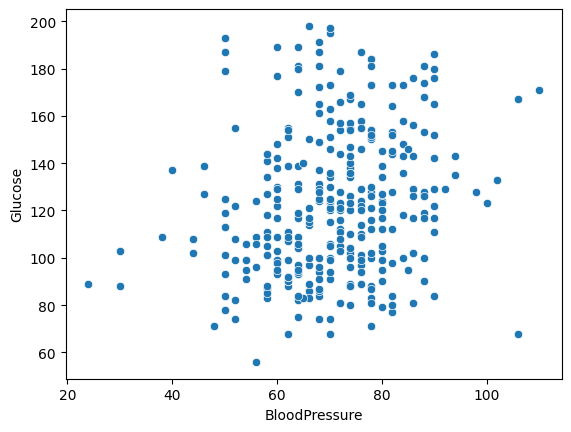

In [68]:
sns.scatterplot(x=df_t['BloodPressure'], y=df_t['Glucose'])

In [86]:
model2 = make_pipeline(PolynomialFeatures(2), LinearRegression())

In [87]:
model2.fit(X_train, y_train)

,steps,"[('polynomialfeatures', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,True
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


In [88]:
model2.score(X_test, y_test)

0.2835362094145245

In [89]:
sns.load_dataset('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [93]:
iris = load_iris().data

In [94]:
X = iris[:, 1].reshape(-1, 1)

In [96]:
X.shape

(150, 1)

In [97]:
y = iris[:, 3]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [100]:
y_pred = model.predict(X_test)

In [101]:
y_pred

array([1.34528753, 0.72635431, 1.46907417, 1.2833942 , 1.34528753,
       0.97392759, 1.2833942 , 1.15960756, 1.71664746, 1.40718085,
       1.09771424, 1.22150088, 0.91203427, 1.15960756, 0.72635431,
       1.03582092, 1.22150088, 1.53096749, 1.34528753, 1.34528753,
       1.09771424, 1.22150088, 0.97392759, 1.34528753, 0.72635431,
       1.22150088, 1.53096749, 1.09771424, 1.22150088, 1.15960756])

In [102]:
y_test

array([1.2, 0.3, 2.3, 1.5, 1.4, 0.4, 1.3, 2.3, 1.5, 1.2, 2. , 0.1, 0.2,
       0.1, 0.3, 1.6, 2.2, 1.1, 1.3, 2.2, 0.2, 1.8, 0.4, 2.1, 2. , 2.3,
       1.8, 2.3, 0.3, 0.2])

In [103]:
mean_squared_error(y_test, y_pred)

0.5617835897948079

In [104]:
r2_score(y_test, y_pred)

0.11621382856661178

In [106]:
model.score(X_test, y_test)

0.11621382856661178

In [134]:
df

,ID,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,TRAIN_000,4,103,60,33,192,24.0,0.966,33,0
1,TRAIN_001,10,133,68,0,0,27.0,0.245,36,0
2,TRAIN_002,4,112,78,40,0,39.4,0.236,38,0
3,TRAIN_003,1,119,88,41,170,45.3,0.507,26,0
4,TRAIN_004,1,114,66,36,200,38.1,0.289,21,0
...,...,...,...,...,...,...,...,...,...,...
647,TRAIN_647,1,91,64,24,0,29.2,0.192,21,0
648,TRAIN_648,10,122,68,0,0,31.2,0.258,41,0
649,TRAIN_649,8,84,74,31,0,38.3,0.457,39,0
650,TRAIN_650,2,81,72,15,76,30.1,0.547,25,0


In [108]:
df_t

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,103,60,33,192,24.0,0.966,33
3,119,88,41,170,45.3,0.507,26
4,114,66,36,200,38.1,0.289,21
5,78,50,32,88,31.0,0.248,26
6,91,54,25,100,25.2,0.234,23
...,...,...,...,...,...,...,...
636,171,110,24,240,45.4,0.721,54
637,152,90,33,29,26.8,0.731,43
638,139,62,41,480,40.7,0.536,21
643,147,74,25,293,34.9,0.385,30


In [109]:
df_t.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Glucose,1.000000,0.213390,0.214293,0.600479,0.212549,0.140880,0.342942
BloodPressure,0.213390,1.000000,0.249560,0.088505,0.292520,-0.031260,0.301791
SkinThickness,0.214293,0.249560,1.000000,0.200479,0.632375,0.119519,0.182784
Insulin,0.600479,0.088505,0.200479,1.000000,0.258074,0.182614,0.196610
BMI,0.212549,0.292520,0.632375,0.258074,1.000000,0.111317,0.078956
DiabetesPedigreeFunction,0.140880,-0.031260,0.119519,0.182614,0.111317,1.000000,0.103043
Age,0.342942,0.301791,0.182784,0.196610,0.078956,0.103043,1.000000


In [173]:
X = df_t[['SkinThickness', 'BloodPressure']]
X

,SkinThickness,BloodPressure
0,33,60
3,41,88
4,36,66
5,32,50
6,25,54
...,...,...
636,24,110
637,33,90
638,41,62
643,25,74


In [174]:
y = df_t['BMI']
y

0      24.0
3      45.3
4      38.1
5      31.0
6      25.2
       ... 
636    45.4
637    26.8
638    40.7
643    34.9
650    30.1
Name: BMI, Length: 332, dtype: object

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
model = LinearRegression()

In [145]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [115]:
model.score(X_test, y_test) # 특징 2개일 때

0.3935090128050943

In [127]:
model.score(X_test, y_test) # 특징 3개일 때

0.39993418924036994

In [133]:
model.score(X_test, y_test) # 특징 3개일 때

0.45459519319426966

In [140]:
model.score(X_test, y_test) # 특징 5개일 때

0.4064265979689916

In [146]:
model.score(X_test, y_test) # 특징 5개일 때


0.3946588222547598

In [147]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [180]:
model_poly = make_pipeline(PolynomialFeatures(4), LinearRegression())

In [181]:
model_poly.fit(X_train, y_train)

,steps,"[('polynomialfeatures', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,4
,interaction_only,False
,include_bias,True
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


In [182]:
model_poly.score(X_test, y_test)

0.5375527230068597

In [ ]:
confusion_matrix()